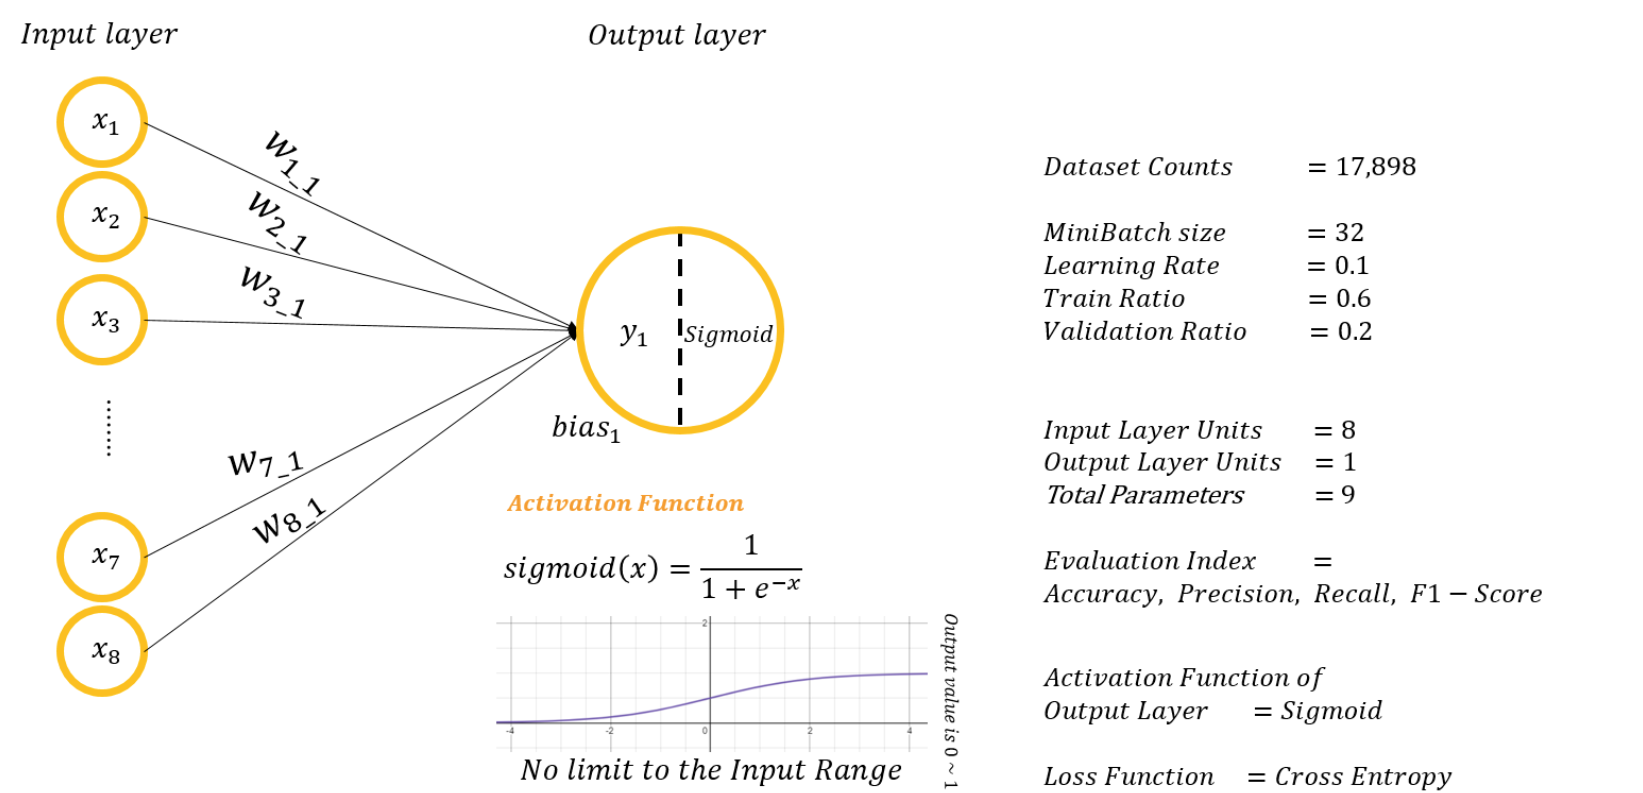

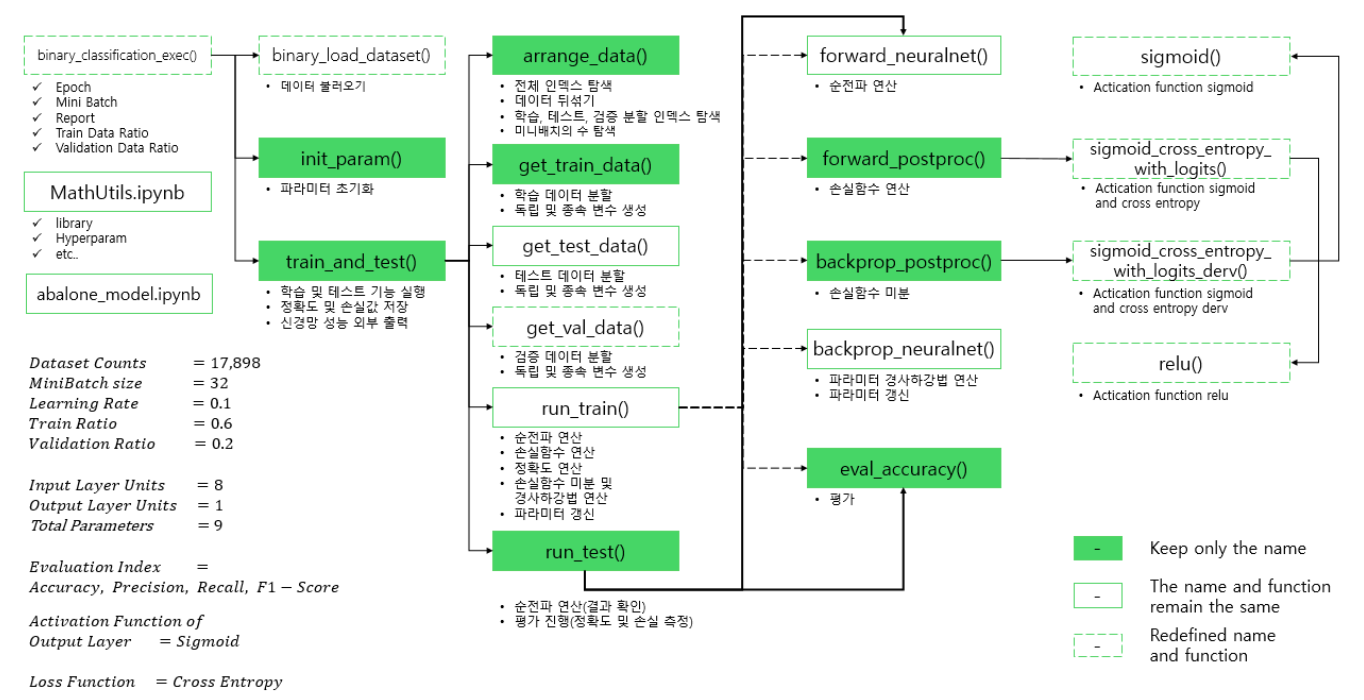

# 첫 번째 출력 예시 
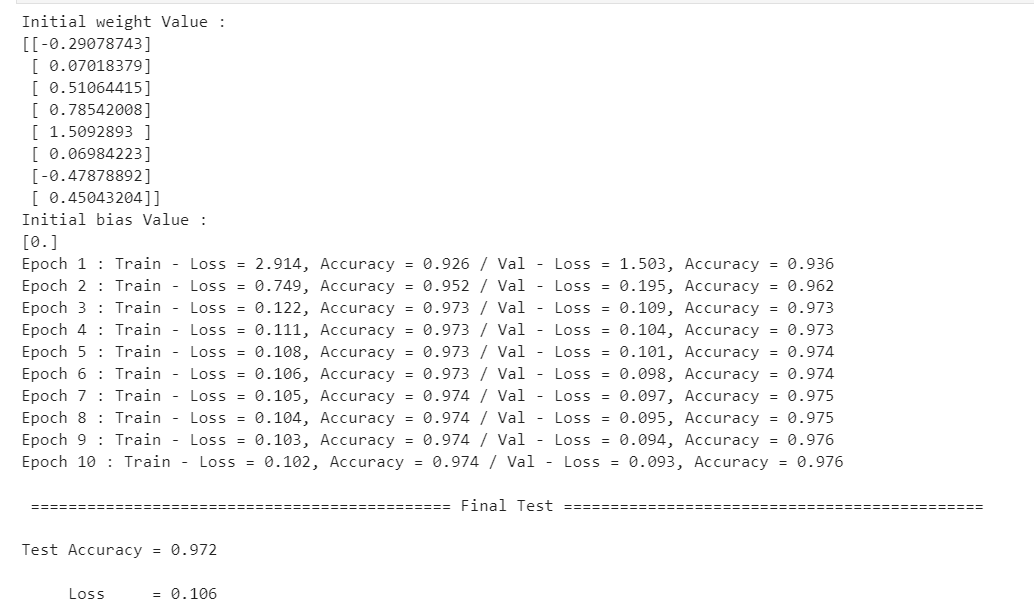

# 두 번째 출력예시 
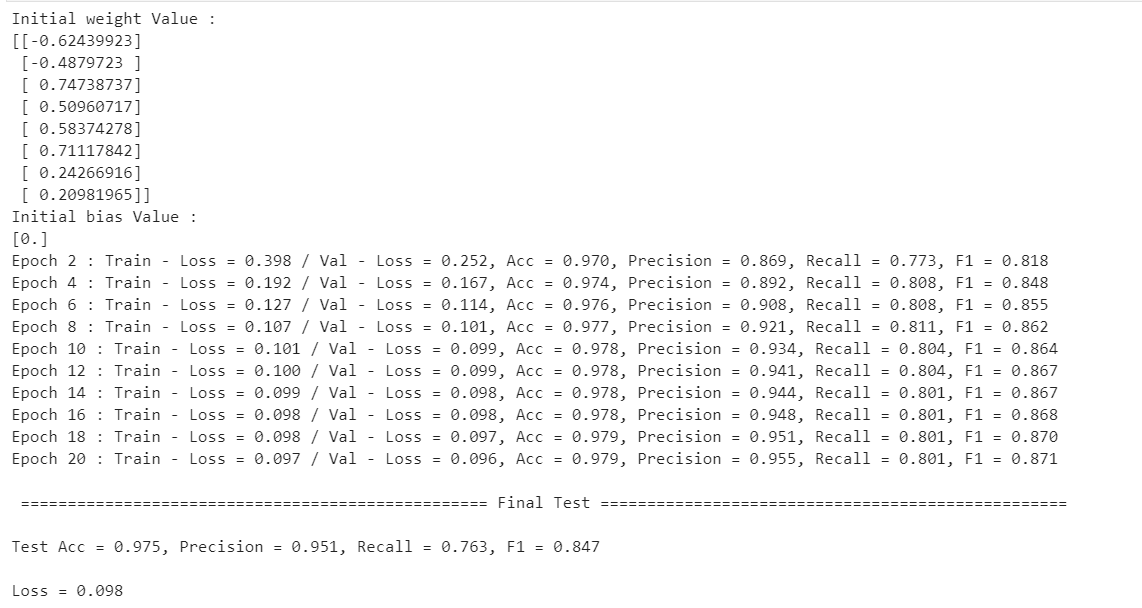

# 시각화 예제

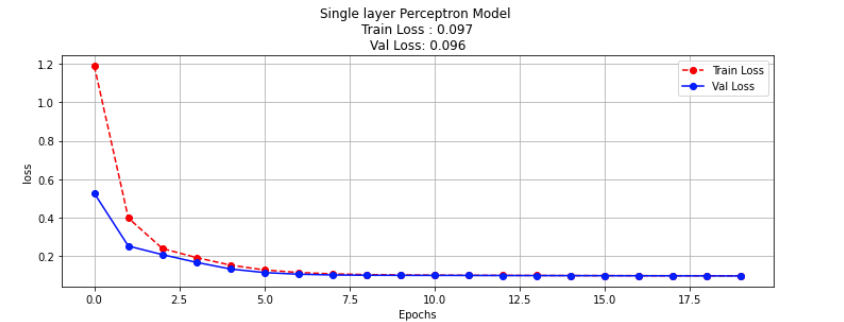

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('pulsar_stars_mini.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,136.093750,51.691005,-0.045909,-0.271816,9.342809,38.096400,4.345438,18.673649,0
1,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
2,100.890625,51.890394,0.627487,-0.026498,3.883779,23.045267,6.953168,52.279440,0
3,116.203125,47.345862,0.211947,-0.022178,3.606187,18.944990,7.035645,59.231226,0
4,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
5,121.882812,53.042675,0.200521,-0.282219,2.116221,16.580876,8.947603,91.011762,0
6,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
7,135.859375,51.937272,0.065769,-0.366114,20.774247,52.772648,2.730909,6.607440,0
8,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
9,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                10 non-null     float64
 1    Standard deviation of the integrated profile  10 non-null     float64
 2    Excess kurtosis of the integrated profile     10 non-null     float64
 3    Skewness of the integrated profile            10 non-null     float64
 4    Mean of the DM-SNR curve                      10 non-null     float64
 5    Standard deviation of the DM-SNR curve        10 non-null     float64
 6    Excess kurtosis of the DM-SNR curve           10 non-null     float64
 7    Skewness of the DM-SNR curve                  10 non-null     float64
 8   target_class                                   10 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 848.0 bytes


In [4]:
df = pd.read_csv('pulsar_stars.csv')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

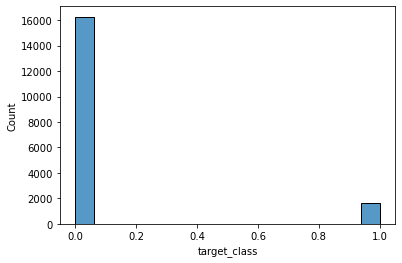

In [6]:
sns.histplot(df['target_class'])
plt.show()

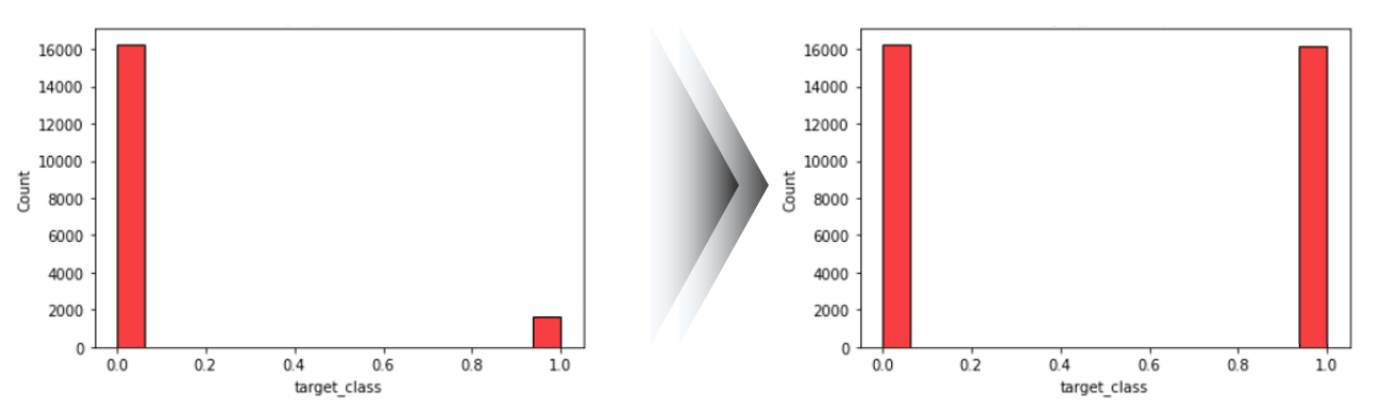

In [7]:
%run MathUtils.ipynb
%run abalone_model.ipynb

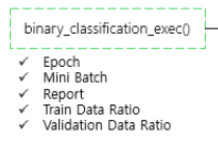

In [8]:
def binary_classification_exec(epoch_count = 10, mb_size = 10, report = 1, train_ratio = 0.6, val_ratio = 0.2):
    binary_load_dataset()
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count, 
                                                                           mb_size, 
                                                                           report, 
                                                                           train_ratio, 
                                                                           val_ratio) # 검증데이터 추가 
    return train_metrics_mean_row, val_metrics_row, test_metrics

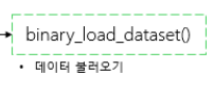

In [9]:
def binary_load_dataset():
    with open('pulsar_stars.csv') as csvfile:
    #with open('/content/pulsar_stars_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)

        rows = []
        for row in csvreader:
            rows.append(row)
    
    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 8, 1

    data = np.asarray(rows, dtype='float32')

In [10]:
binary_load_dataset()

In [11]:
data.shape

(17898, 9)

In [12]:
data[:5]

array([[ 1.40562500e+02,  5.56837807e+01, -2.34571412e-01,
        -6.99648380e-01,  3.19983268e+00,  1.91104259e+01,
         7.97553158e+00,  7.42422256e+01,  0.00000000e+00],
       [ 1.02507812e+02,  5.88824310e+01,  4.65318143e-01,
        -5.15087903e-01,  1.67725754e+00,  1.48601456e+01,
         1.05764866e+01,  1.27393578e+02,  0.00000000e+00],
       [ 1.03015625e+02,  3.93416481e+01,  3.23328376e-01,
         1.05116439e+00,  3.12123752e+00,  2.17446690e+01,
         7.73582220e+00,  6.31719093e+01,  0.00000000e+00],
       [ 1.36750000e+02,  5.71784477e+01, -6.84146360e-02,
        -6.36238396e-01,  3.64297652e+00,  2.09592800e+01,
         6.89649868e+00,  5.35936623e+01,  0.00000000e+00],
       [ 8.87265625e+01,  4.06722260e+01,  6.00866079e-01,
         1.12349164e+00,  1.17892981e+00,  1.14687195e+01,
         1.42695732e+01,  2.52567307e+02,  0.00000000e+00]], dtype=float32)

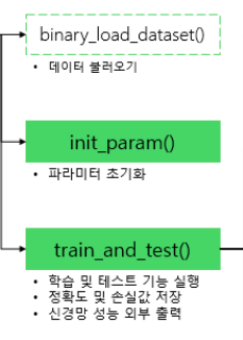

In [13]:
def init_param():
    global weight, bias 

    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])

    print("Initial weight value : \n", weight)
    print("Initial bias value : \n", bias)

In [14]:
init_param()

Initial weight value : 
 [[ 0.02059099]
 [ 0.00587787]
 [-0.02550615]
 [-0.03178362]
 [-0.07181057]
 [-0.01159901]
 [-0.01165057]
 [-0.05523391]]
Initial bias value : 
 [0.]


In [15]:
weight

array([[ 0.02059099],
       [ 0.00587787],
       [-0.02550615],
       [-0.03178362],
       [-0.07181057],
       [-0.01159901],
       [-0.01165057],
       [-0.05523391]])

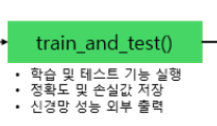

In [16]:
def train_and_test():
    pass # 함수 내부 기능 구축 후 작성 예정  

In [17]:
 train_and_test()

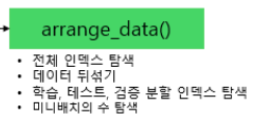

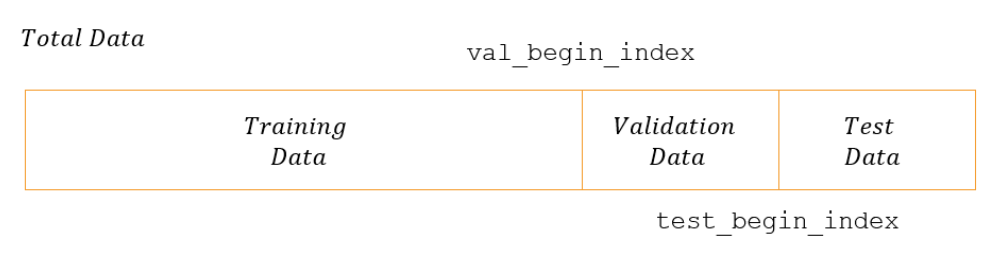

In [18]:
def arrange_data(mb_size, train_ratio, val_ratio):
    global shuffle_map, test_begin_index, val_begin_index

    shuffle_map = np.arange(data.shape[0])

    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size 

    val_begin_index = mini_batch_step_count * mb_size
    test_begin_index = int(val_begin_index + (val_ratio * data.shape[0]))

    return mini_batch_step_count

In [19]:
mini_batch_step_count = arrange_data(mb_size = 6, train_ratio = 0.6, val_ratio = 0.2)
print("mini_batch_step_count : ", mini_batch_step_count)
print("val_begin_index : ", val_begin_index)
print("test_begin_index : ", test_begin_index)

mini_batch_step_count :  1789
val_begin_index :  10734
test_begin_index :  14313


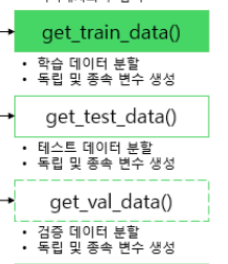

In [20]:
def get_test_data():
    test_data = data[shuffle_map[test_begin_index : ]]
    return test_data[:, : -output_cnt], test_data[:, -output_cnt : ]

def get_val_data():
    val_data = data[shuffle_map[ val_begin_index : test_begin_index ]]
    return val_data[:, : -output_cnt], val_data[:, -output_cnt : ]

# 학습 데이터를 생성하는 함수 (미니배치 기능 추가)
def get_train_data(mb_size, n):
    from_idx = n * mb_size 
    to_idx   = (n + 1) * mb_size
    
    train_data = data[shuffle_map[from_idx : to_idx]]

    return train_data[:, : -output_cnt], train_data[:, -output_cnt : ]

In [21]:
test_X, test_Y   = get_test_data()
val_X, val_Y     = get_val_data()
train_X, train_Y = get_train_data(mb_size = 2,n = 0)

In [22]:
print(test_X.shape, test_Y.shape)
print(val_X.shape, val_Y.shape)
print(train_X.shape, train_Y.shape)

(3585, 8) (3585, 1)
(3579, 8) (3579, 1)
(2, 8) (2, 1)


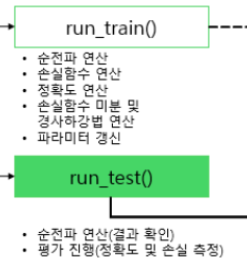

In [23]:
def run_train(x, y):
    loss     = 0
    accuracy = 100

    return loss, accuracy

In [24]:
train_loss, train_acc = run_train(0, 0)
print(train_loss, train_acc)

0 100


In [25]:
def run_test(x, y):
    loss     = 0
    accuracy = 100

    return loss, accuracy

In [26]:
test_loss, test_acc = run_test(0, 0)
print(test_loss, test_acc)

0 100


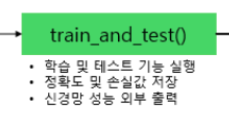

In [27]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):

    mini_batch_step_count = arrange_data(mb_size, train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    # 새롭게 추가된 코드 ▼
    val_x, val_y   = get_val_data()

    # 새롭게 추가된 코드 ▼
    val_loss_row, val_acc_row      = [], []
    losses_mean_row, accs_mean_row = [], []
    # 에폭에 따른 반복문 
    for epoch in range(epoch_count):

        losses = []
        accs   = []
        # 배치에 따른 반복문 
        for n in range(mini_batch_step_count):
            train_x, train_y = get_train_data(mb_size, n)

            loss, acc        = run_train(train_x, train_y)

            losses.append(loss)
            accs.append(acc)
            
        # 새롭게 추가된 코드 ▼
        val_loss, val_acc = run_test(val_x, val_y)
        val_loss_row.append(val_loss)
        val_acc_row.append(val_acc)

        if report > 0 and (epoch + 1) % report == 0:
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Val - Loss = {:.3f}, Accuracy = {:.3f}".\
                  format(epoch + 1, np.mean(losses), np.mean(accs), val_loss, val_acc))
            
        
        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs)

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)

    # 테스트 데이터를 가지고 테스트 수행
    test_loss, test_acc = run_test(test_x, test_y)

    print('\n', "=" * 40, "Final Test", "=" * 40)
    print("\nTest Accuracy = {:.3f}".format(test_acc))
    print("\nTest Loss     = {:.3f}".format(test_loss))

    return [losses_mean_row, accs_mean_row], [val_loss_row, val_acc_row], [test_loss, test_acc]


In [28]:
train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count     = 100, 
                                                                           mb_size     = 1, 
                                                                           report      = 1, 
                                                                           train_ratio = 0.6, 
                                                                           val_ratio   = 0.2)

Epoch 1 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 2 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 3 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 4 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 5 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 6 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 7 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 8 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 9 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 10 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 11 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accur

# 첫 번째 출력 예시 
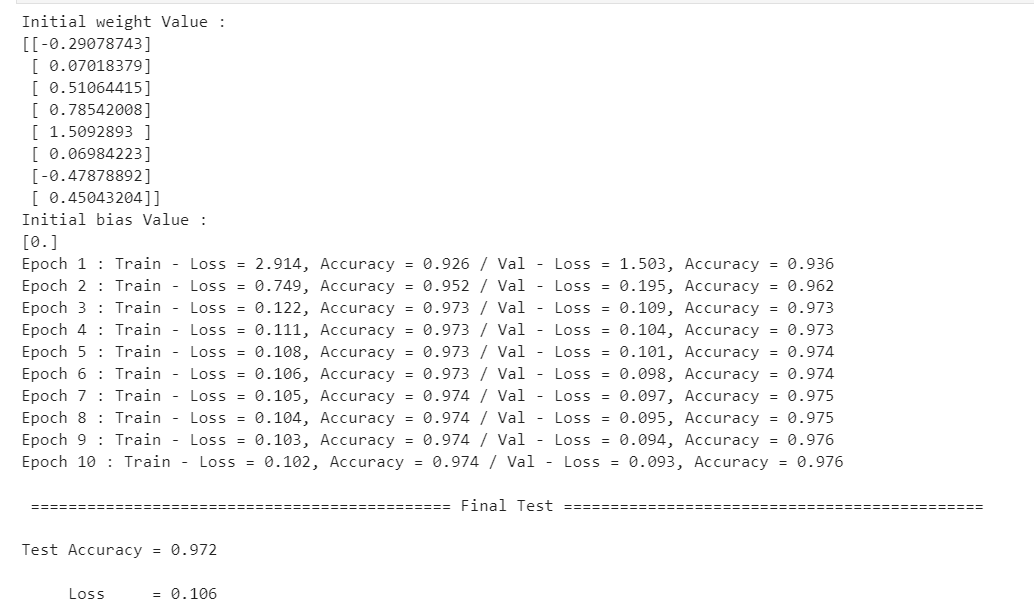

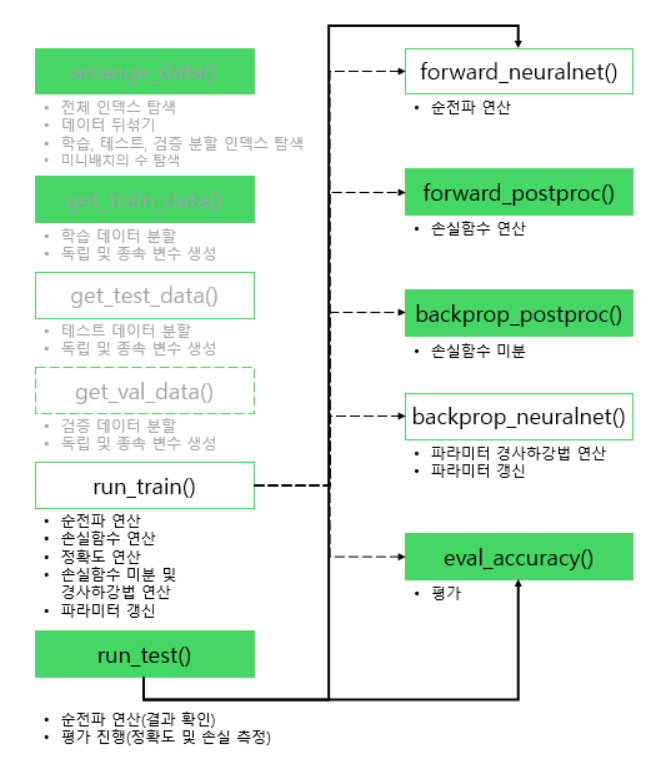

In [29]:
# 미니배치 사이즈에 설정한 값 만큼 데이터 출력
train_X

array([[ 1.0966406e+02,  5.6167339e+01,  2.8952664e-01, -4.7753334e-01,
         2.4180603e+00,  1.7874912e+01,  9.1334362e+00,  9.3991722e+01],
       [ 1.1413281e+02,  4.5004406e+01,  9.0974785e-02, -1.9193602e-01,
         3.1446488e+00,  1.7454767e+01,  7.4013686e+00,  6.8856667e+01]],
      dtype=float32)

In [30]:
def forward_neuralnet(x):
    y_hat = np.matmul(x, weight) + bias
    return y_hat, x

In [31]:
y_hat, _ = forward_neuralnet(train_X)
print("y_hat : \n", y_hat)

y_hat : 
 [[-3.0828844 ]
 [-1.69931227]]


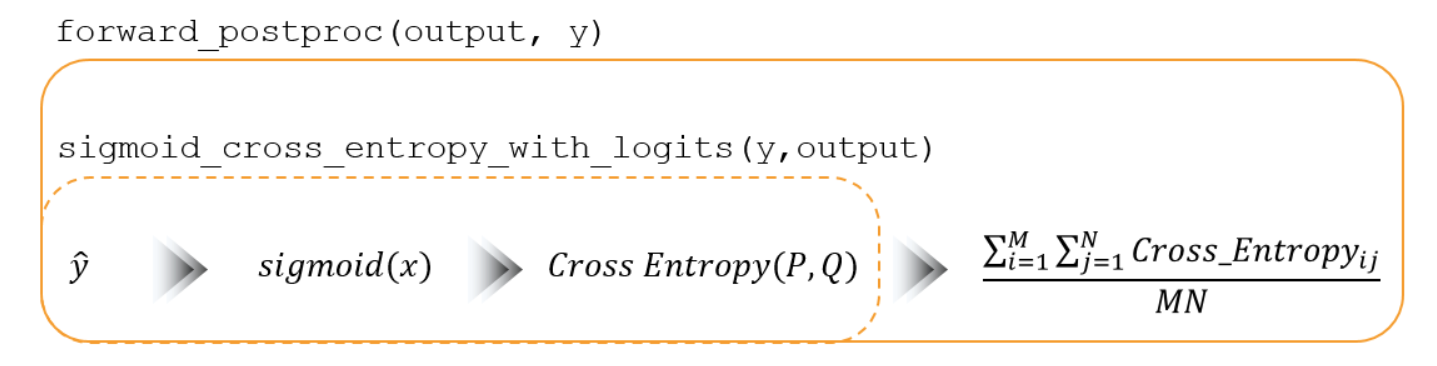

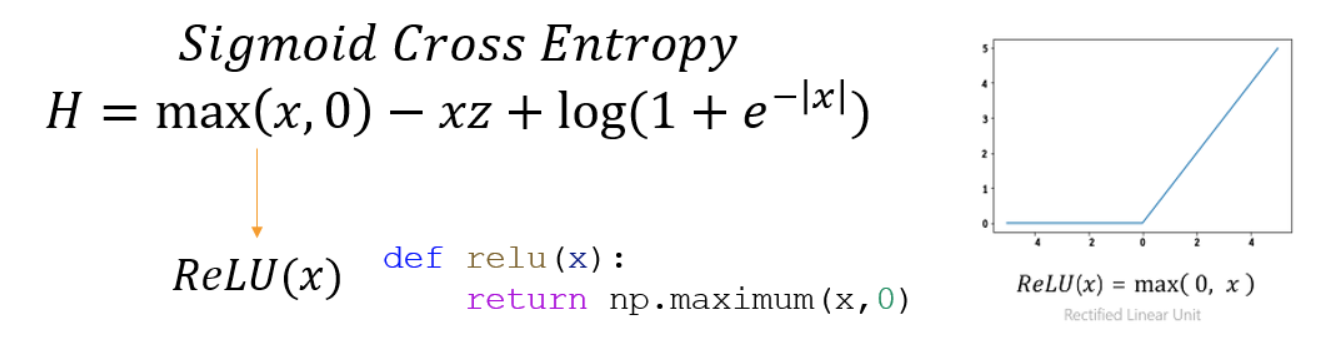

In [32]:
def relu(x):
    return np.maximum(x, 0)

In [33]:
# z 는 실제 확률 분포 / x는 신경망이 출력해낸 값
def sigmoid_cross_entropy_with_logits(z, x):
    return relu(x) - x * z + np.log(1 + np.exp(-np.abs(x)))

In [34]:
loss = sigmoid_cross_entropy_with_logits(train_Y, y_hat)
print("loss : \n",loss)

loss : 
 [[0.04480785]
 [0.16789229]]


In [35]:
train_X

array([[ 1.0966406e+02,  5.6167339e+01,  2.8952664e-01, -4.7753334e-01,
         2.4180603e+00,  1.7874912e+01,  9.1334362e+00,  9.3991722e+01],
       [ 1.1413281e+02,  4.5004406e+01,  9.0974785e-02, -1.9193602e-01,
         3.1446488e+00,  1.7454767e+01,  7.4013686e+00,  6.8856667e+01]],
      dtype=float32)

In [36]:
train_Y

array([[0.],
       [0.]], dtype=float32)

In [37]:
y_hat

array([[-3.0828844 ],
       [-1.69931227]])

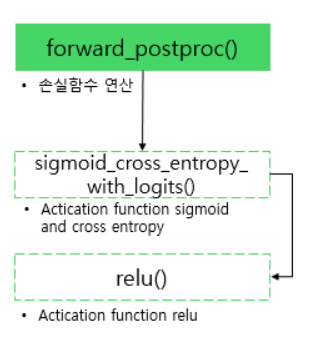

In [38]:
def forward_postproc(output, y):
    CEE   = sigmoid_cross_entropy_with_logits(y, output)
    loss  = np.mean(CEE)

    return loss, [y, output, CEE]

In [39]:
loss, _ = forward_postproc(y_hat, train_Y)
print("loss : ", loss)

loss :  0.1063500696574251


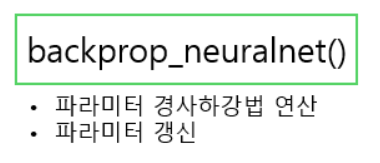

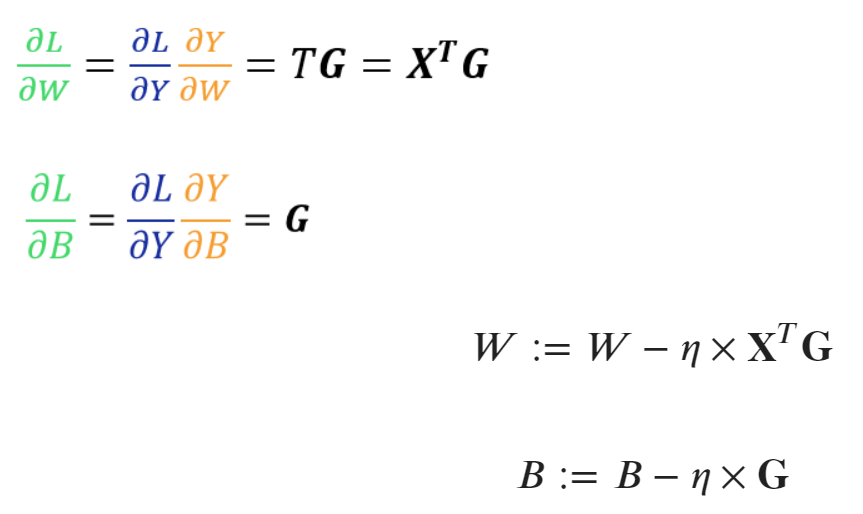

In [40]:
def backprop_neuralnet(G_output, x):
    global weight, bias 

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)
    
    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w
    bias   -= LEARNING_RATE * G_b

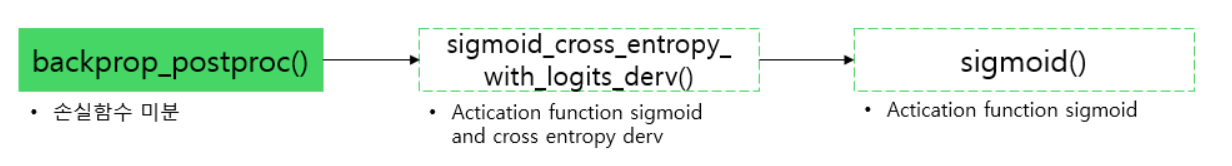

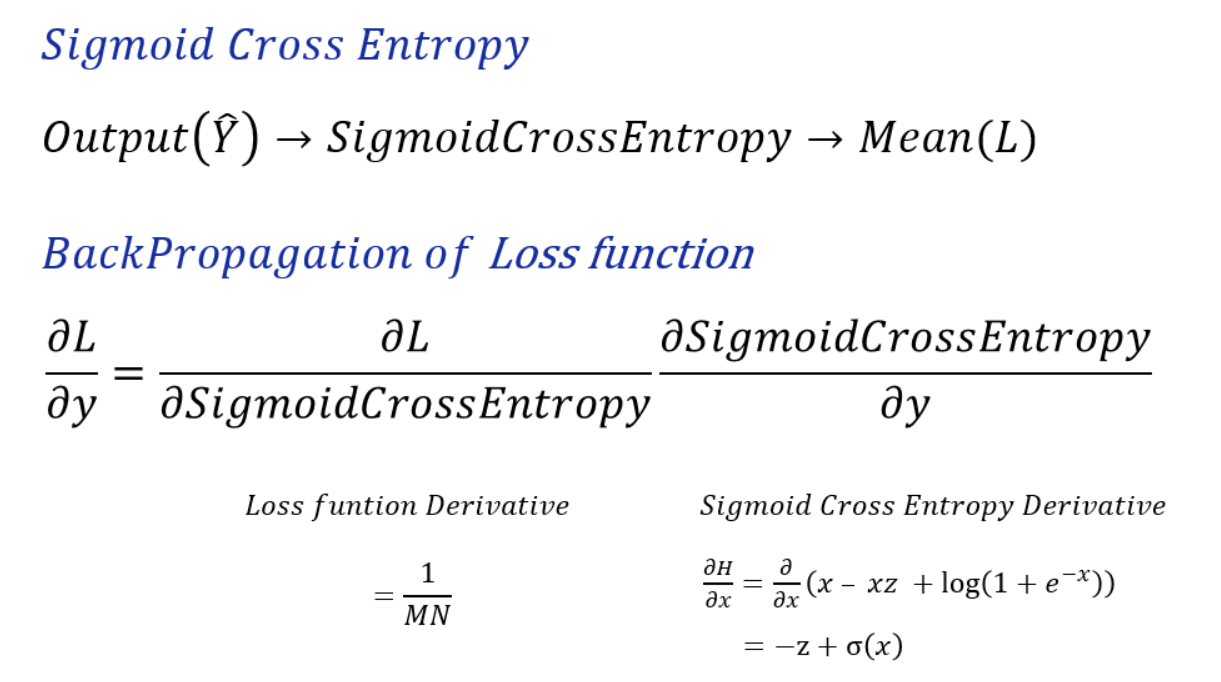

In [41]:
def sigmoid_cross_entropy_with_logits_derv(z, x):
    return -z + sigmoid(x)

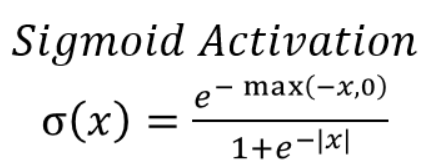

In [42]:
def sigmoid(x):
    return np.exp(-relu(-x)) / (1.0 + np.exp(-np.abs(x)))

In [43]:
result = sigmoid_cross_entropy_with_logits_derv(z = train_Y, x = y_hat)
print(result)

[[0.0438188 ]
 [0.15455511]]


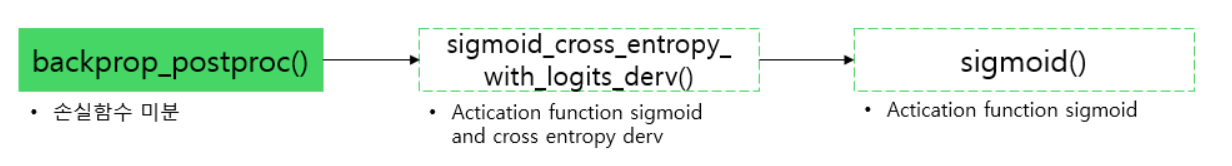

In [44]:
def backprop_postproc(aux_pp_y_output_CEE):

    y, output, CEE = aux_pp_y_output_CEE

    g_loss_entropy   = 1.0 / np.prod(CEE.shape)
    g_entropy_output = sigmoid_cross_entropy_with_logits_derv(y, output)

    G_output = g_entropy_output * g_loss_entropy 

    return G_output

In [45]:
loss.shape

()

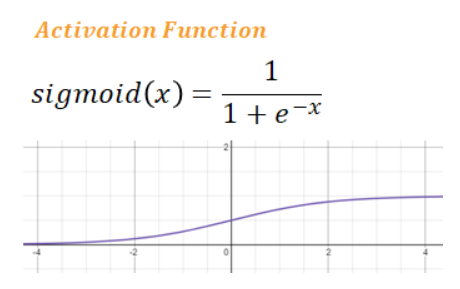

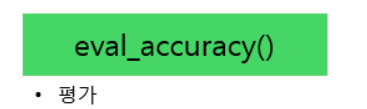

In [46]:
output_list = [-10, -5, 0, 5 , 10]

for output in output_list:
    result = np.greater(output, 0)
    print(result)

False
False
False
True
True


In [47]:
def eval_accuracy(output, y):

    estimate = np.greater(output, 0)

    answer   = np.greater(y, 0.5)

    correct = np.equal(estimate, answer)

    return np.mean(correct)

In [48]:
acc = eval_accuracy(y_hat, train_Y)
print("Acc : {:.2f} %".format(acc * 100))

Acc : 100.00 %


In [49]:
y_hat

array([[-3.0828844 ],
       [-1.69931227]])

In [50]:
train_Y

array([[0.],
       [0.]], dtype=float32)

In [51]:
def run_train(x, y):
    y_hat, aux_nn_x           = forward_neuralnet(x)
    loss, aux_pp_y_output_CEE = forward_postproc(y_hat, y)

    accuracy = eval_accuracy(y_hat, y)

    G_output = backprop_postproc(aux_pp_y_output_CEE)
    backprop_neuralnet(G_output, aux_nn_x)

    return loss, accuracy

In [52]:
def run_test(x,y):
    y_hat, _ =  forward_neuralnet(x)
    loss, _  =  forward_postproc(y_hat, y)
    accuracy =  eval_accuracy(y_hat, y)

    return loss, accuracy

In [53]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size = 32, 
                                                                                   report = 1, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio = 0.2)

Initial weight value : 
 [[ 0.0727196 ]
 [ 0.04408149]
 [ 0.00318012]
 [-0.03027636]
 [-0.01552844]
 [ 0.01083569]
 [ 0.02975976]
 [ 0.03270406]]
Initial bias value : 
 [0.]
Epoch 1 : Train - Loss = 8.043, Accuracy = 0.942 / Val - Loss = 8.095, Accuracy = 0.941
Epoch 2 : Train - Loss = 5.465, Accuracy = 0.950 / Val - Loss = 5.520, Accuracy = 0.954
Epoch 3 : Train - Loss = 4.710, Accuracy = 0.952 / Val - Loss = 16.473, Accuracy = 0.939
Epoch 4 : Train - Loss = 5.845, Accuracy = 0.952 / Val - Loss = 5.271, Accuracy = 0.966
Epoch 5 : Train - Loss = 4.805, Accuracy = 0.955 / Val - Loss = 6.379, Accuracy = 0.950
Epoch 6 : Train - Loss = 5.293, Accuracy = 0.955 / Val - Loss = 5.790, Accuracy = 0.961
Epoch 7 : Train - Loss = 4.803, Accuracy = 0.955 / Val - Loss = 11.483, Accuracy = 0.959
Epoch 8 : Train - Loss = 6.486, Accuracy = 0.952 / Val - Loss = 10.023, Accuracy = 0.953
Epoch 9 : Train - Loss = 5.386, Accuracy = 0.958 / Val - Loss = 1.913, Accuracy = 0.969
Epoch 10 : Train - Loss = 6.409

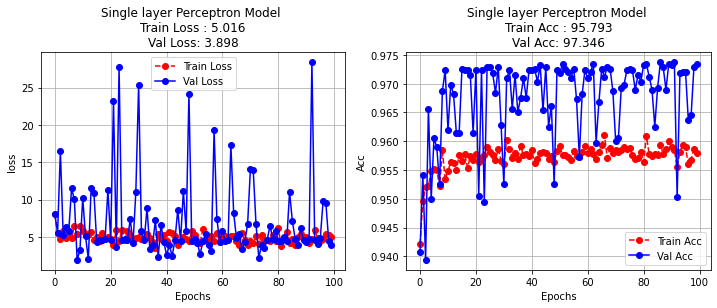

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(train_metrics_mean_row[0], '--o', color = 'red', label = 'Train Loss')
plt.plot(val_metrics_row[0], '-o', color = 'blue', label = 'Val Loss')

plt.title('Single layer Perceptron Model \nTrain Loss : {:.3f}\nVal Loss: {:.3f}'.format(train_metrics_mean_row[0][-1] , val_metrics_row[0][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(train_metrics_mean_row[1], '--o', color = 'red', label = 'Train Acc')
plt.plot(val_metrics_row[1], '-o', color = 'blue', label = 'Val Acc')

plt.title('Single layer Perceptron Model \nTrain Acc : {:.3f}\nVal Acc: {:.3f}'.format(train_metrics_mean_row[1][-1] * 100 , val_metrics_row[1][-1] * 100))
plt.xlabel('Epochs')
plt.ylabel('Acc')
#plt.ylim(0.9,1)
plt.grid()
plt.legend()

plt.show()